## Togo Solar Radiation Data Analysis
This notebook focuses on exploring and cleaning the solar radiation data for Togo (Dapaong).
We will perform initial data profiling, check for missing or invalid values, and clean the dataset to prepare it for visualization and further analysis.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
os.getcwd()
from scipy import stats
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score




In [ ]:
df_togo = pd.read_csv('../data/togo-dapaong_qc.csv')
display(df_togo.head())
df_togo.info()


ValueError: Missing column provided to 'parse_dates': 'timestamp'

In [47]:
import os

print("Current working directory:", os.getcwd())

print("\nFiles and folders here:")
print(os.listdir())

if 'data' in os.listdir():
    print("\nFiles inside 'data' folder:")
    print(os.listdir('data'))
else:
    print("\nNo 'data' folder found here.")


Current working directory: c:\Users\HP\Desktop\solar-challenge-week1\notebooks

Files and folders here:
['.gitkeep', 'benin_eda.ipynb', 'sierra_leone.ipynb', 'togo_dapaong.ipynb']

No 'data' folder found here.


In [3]:
print(df_togo.columns)


Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')


In [4]:
df_togo = df_togo.drop(columns=['Comments'], errors='ignore')
print(df_togo)

               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1       2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2       2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3       2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4       2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-10-24 23:56 -0.8  0.0  0.0   0.0   0.0  25.2  53.8  0.0     0.0   
525596  2022-10-24 23:57 -0.9  0.0  0.0   0.0   0.0  25.3  53.5  0.0     0.0   
525597  2022-10-24 23:58 -1.0  0.0  0.0   0.0   0.0  25.3  53.4  0.0     0.0   
525598  2022-10-24 23:59 -1.1  0.0  0.0   0.0   0.0  25.4  53.5  0.0     0.0   
525599  2022-10-25 00:00 -1.2  0.0  0.0   0.0   0.0  25.4  52.3  0.0     0.0   

        WSstdev     WD  WDstdev   BP  C

In [5]:
df_togo['GHI'] = df_togo['GHI'].interpolate(method='linear')
print(df_togo[['GHI', 'DNI', 'DHI']].describe())


                 GHI            DNI            DHI
count  525600.000000  525600.000000  525600.000000
mean      230.555040     151.258469     116.444352
std       322.532347     250.956962     156.520714
min       -12.700000       0.000000       0.000000
25%        -2.200000       0.000000       0.000000
50%         2.100000       0.000000       2.500000
75%       442.400000     246.400000     215.700000
max      1424.000000    1004.500000     805.700000


In [6]:
print(df_togo[['DNI', 'DHI']].value_counts())


DNI    DHI  
0.0    0.0      253015
       0.6         822
       0.7         724
       0.8         661
       0.9         619
                 ...  
       437.0         1
       437.1         1
       437.2         1
       437.3         1
711.1  249.3         1
Name: count, Length: 223459, dtype: int64


In [7]:
zero_dni_dhi = (df_togo[(df_togo['DNI'] == 0) & (df_togo['DHI'] == 0)].shape[0]) / df_togo.shape[0] * 100
print(f"Percentage of zero DNI and DHI values: {zero_dni_dhi:.2f}%")


Percentage of zero DNI and DHI values: 48.14%


In [8]:
print(df_togo.isnull().sum())
df_togo.ffill(inplace=True)
if 'Timestamp' in df_togo.columns:
    df_togo['Timestamp'] = pd.to_datetime(df_togo['Timestamp'])
    df_togo.set_index('Timestamp', inplace=True)

df_togo.drop

Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64


<bound method DataFrame.drop of                      GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
Timestamp                                                                 
2021-10-25 00:01:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
2021-10-25 00:02:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2021-10-25 00:03:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
2021-10-25 00:04:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
2021-10-25 00:05:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   
...                  ...  ...  ...   ...   ...   ...   ...  ...     ...   
2022-10-24 23:56:00 -0.8  0.0  0.0   0.0   0.0  25.2  53.8  0.0     0.0   
2022-10-24 23:57:00 -0.9  0.0  0.0   0.0   0.0  25.3  53.5  0.0     0.0   
2022-10-24 23:58:00 -1.0  0.0  0.0   0.0   0.0  25.3  53.4  0.0     0.0   
2022-10-24 23:59:00 -1.1  0.0  0.0   0.0   0.0  25.4  53.5  0.0     0.0   
2022-10-25 00:00:00 -1.2  0.0  0.0   0.0   0.0  25.4  52.3  0.0     

In [9]:
print(df_togo.duplicated().sum())
df_togo.drop_duplicates(inplace=True)


3168


In [10]:
df_togo[['ModA', 'ModB']] = df_togo[['ModA', 'ModB']].applymap(lambda x: np.nan if x < 0 else x)
df_togo[['ModA', 'ModB']] = df_togo[['ModA', 'ModB']].ffill()


C:\Users\HP\AppData\Local\Temp\ipykernel_18840\1547695219.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_togo[['ModA', 'ModB']] = df_togo[['ModA', 'ModB']].applymap(lambda x: np.nan if x < 0 else x)


In [13]:
warnings.simplefilter(action='ignore', category=FutureWarning)
df_togo[['Tamb', 'TModA', 'TModB']] = df_togo[['Tamb', 'TModA', 'TModB']].applymap(lambda x: np.nan if x < -50 or x > 100 else x)

In [14]:
df_togo[['WS', 'WSgust', 'WSstdev']] = df_togo[['WS', 'WSgust', 'WSstdev']].applymap(lambda x: np.nan if x < 0 else x)
df_togo['RH'] = df_togo['RH'].apply(lambda x: np.nan if x < 0 or x > 100 else x)
df_togo['BP'] = df_togo['BP'].apply(lambda x: np.nan if x < 800 or x > 1100 else x)
df_togo['Cleaning'] = df_togo['Cleaning'].apply(lambda x: 1 if x == 1 else 0)
df_togo['Precipitation'] = df_togo['Precipitation'].apply(lambda x: np.nan if x < 0 else x)
df_togo.ffill(inplace=True)


In [15]:
print(df_togo.isnull().sum())
print(df_togo[['RH', 'WS', 'WSgust', 'WSstdev', 'BP', 'Precipitation']].describe())


GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64
                  RH             WS         WSgust        WSstdev  \
count  522432.000000  522432.000000  522432.000000  522432.000000   
mean       54.799188       2.382446       3.249064       0.561120   
std        28.700364       1.455398       1.871351       0.266199   
min         3.300000       0.000000       0.000000       0.000000   
25%        26.400000       1.400000       1.900000       0.400000   
50%        59.000000       2.200000       3.000000       0.500000   
75%        80.500000       3.200000       4.400000       0.700000   
max        99.800000      16.100000      23.100000       4.700000   

                  BP  Precipitation  
coun

# **EDA: Togo Solar Radiation Data**  
We analyze trends in `GHI`, `DNI`, and `DHI`, handle missing values, detect anomalies, and visualize seasonal variations to ensure data reliability.  


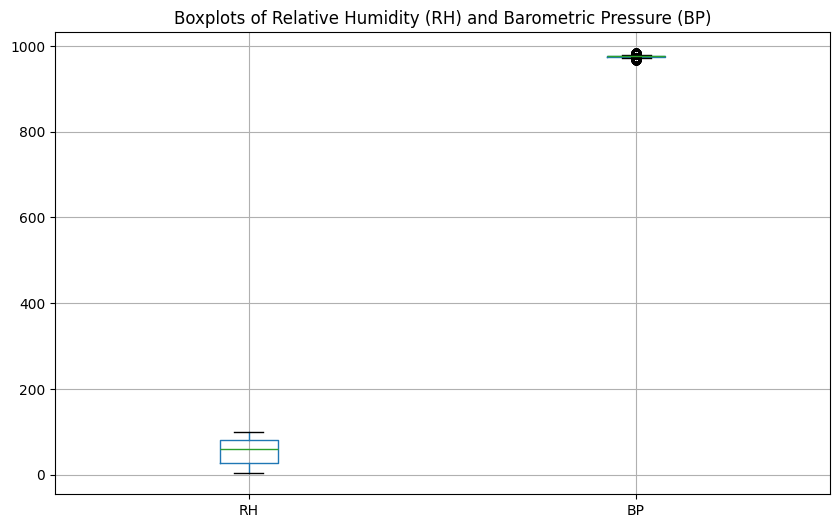

In [17]:
df_togo[['RH', 'BP']].boxplot(figsize=(10, 6))
plt.title('Boxplots of Relative Humidity (RH) and Barometric Pressure (BP)')
plt.show()


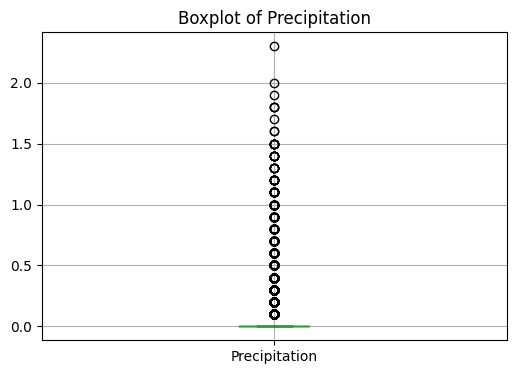

In [18]:
df_togo[['Precipitation']].boxplot(figsize=(6, 4))
plt.title('Boxplot of Precipitation')
plt.show()


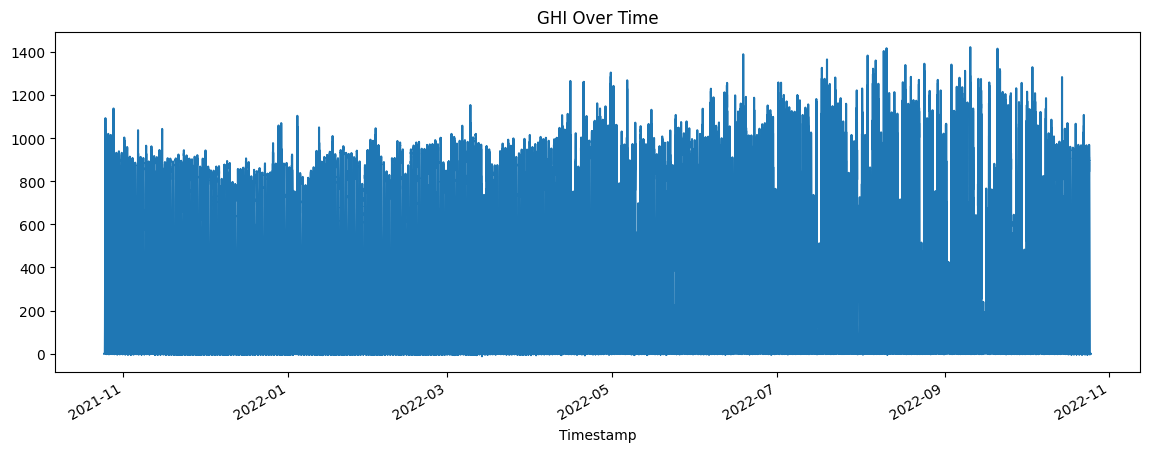

In [20]:
df_togo['GHI'].plot(figsize=(14, 5), title='GHI Over Time')
plt.show()


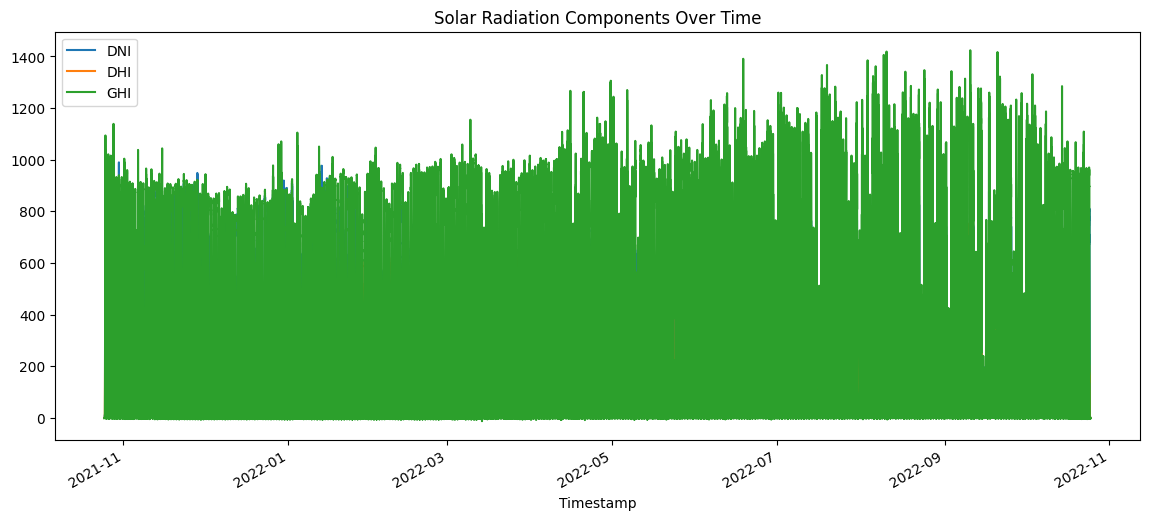

In [21]:
df_togo[['DNI', 'DHI', 'GHI']].plot(figsize=(14, 6), title='Solar Radiation Components Over Time')
plt.show()


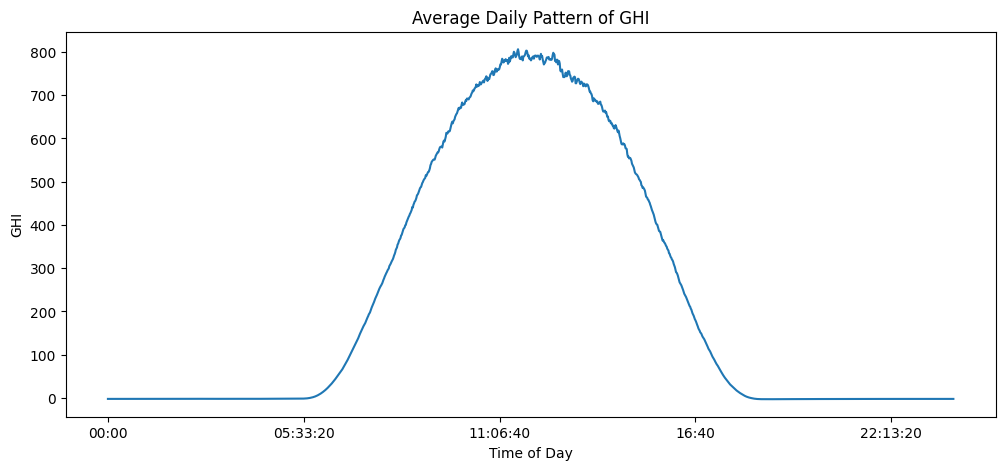

In [22]:
daily_avg = df_togo['GHI'].groupby(df_togo.index.time).mean()
daily_avg.plot(figsize=(12, 5), title='Average Daily Pattern of GHI')
plt.xlabel('Time of Day')
plt.ylabel('GHI')
plt.show()


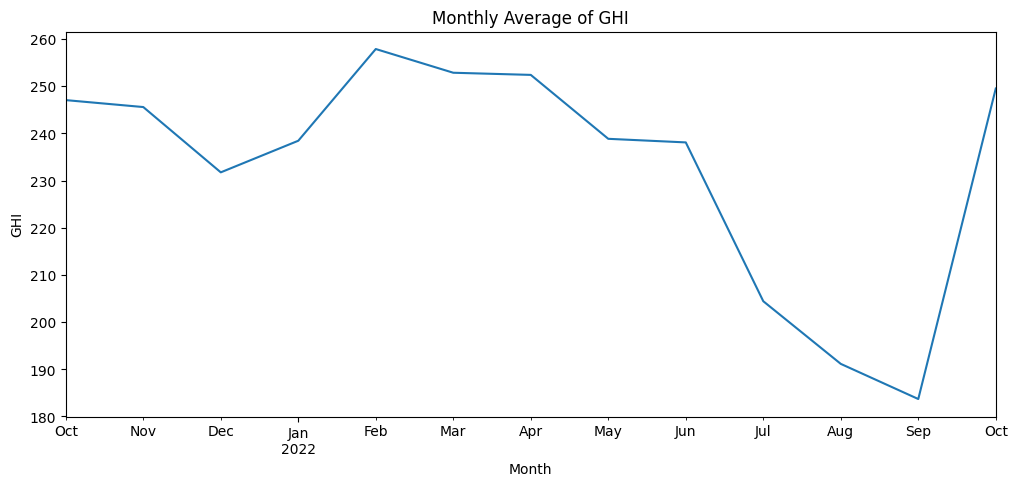

In [23]:
monthly_avg = df_togo['GHI'].resample('M').mean()
monthly_avg.plot(figsize=(12, 5), title='Monthly Average of GHI')
plt.xlabel('Month')
plt.ylabel('GHI')
plt.show()


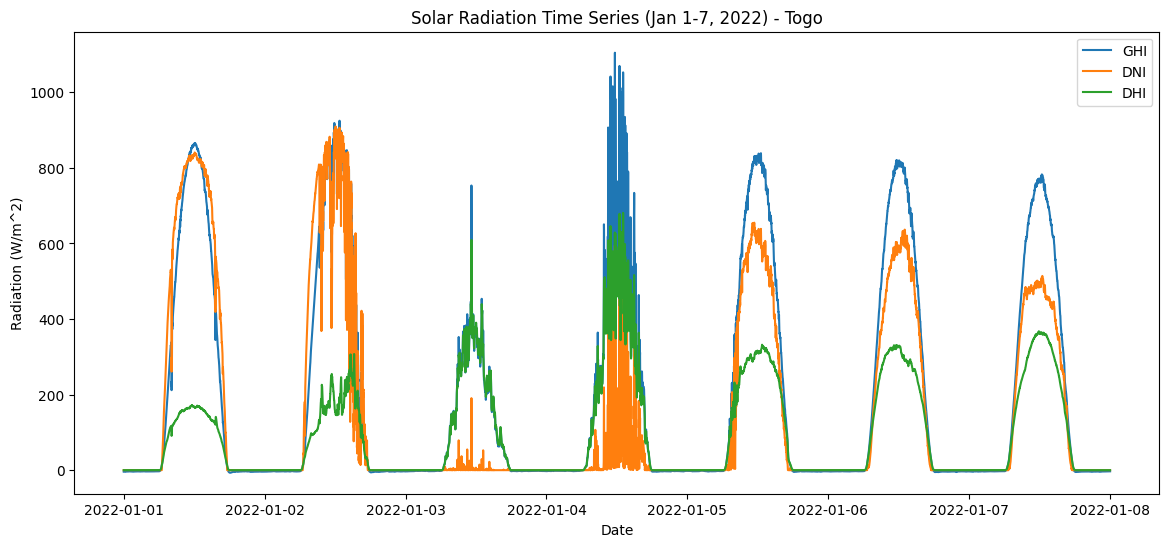

In [25]:
sample_period = df_togo['2022-01-01':'2022-01-07']

plt.figure(figsize=(14,6))
plt.plot(sample_period.index, sample_period['GHI'], label='GHI')
plt.plot(sample_period.index, sample_period['DNI'], label='DNI')
plt.plot(sample_period.index, sample_period['DHI'], label='DHI')
plt.xlabel('Date')
plt.ylabel('Radiation (W/m^2)')
plt.title('Solar Radiation Time Series (Jan 1-7, 2022) - Togo')
plt.legend()
plt.show()


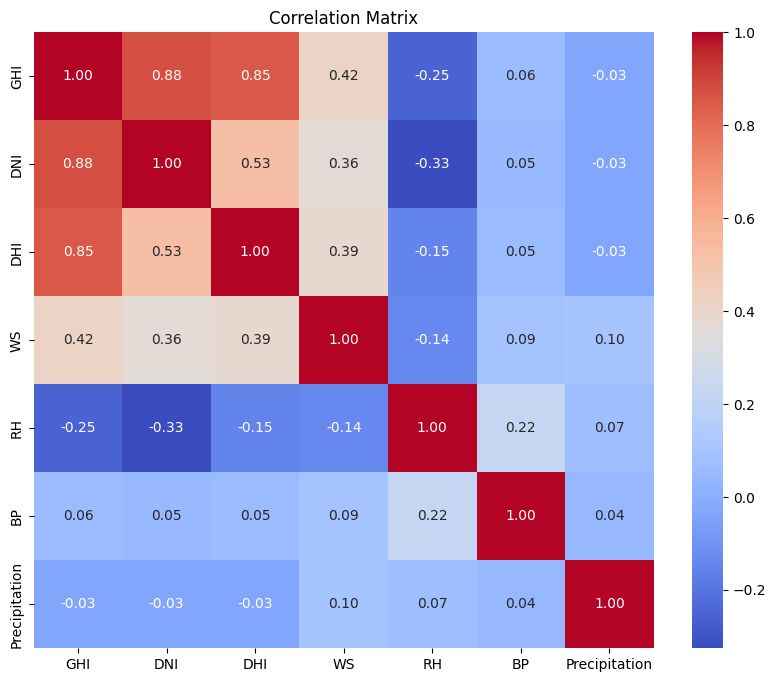

In [24]:
cols = ['GHI', 'DNI', 'DHI', 'WS', 'RH', 'BP', 'Precipitation']
corr = df_togo[cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [28]:
def profile_data(df):
    desc = df.describe()
    missing = df.isna().sum()
    missing_over_5 = missing[missing > 0]
    return desc, missing_over_5

def detect_and_clean_outliers(df, cols):
    from scipy.stats import zscore
    df_clean = df.copy()
    z_scores = df_clean[cols].apply(zscore)
    outliers = (z_scores.abs() > 3)
    for col in cols:
        df_clean.loc[outliers[col], col] = df_clean[col].median()
    df_clean = df_clean.fillna(df_clean.median())
    return df_clean

def plot_basic_eda(df, country_name):
    plt.figure(figsize=(14, 6))
    plt.plot(df.index, df['GHI'], label='GHI')
    plt.plot(df.index, df['DNI'], label='DNI')
    plt.plot(df.index, df['DHI'], label='DHI')
    plt.title(f'Solar Radiation Time Series for {country_name}')
    plt.xlabel('Date')
    plt.ylabel('Radiation (W/m²)')
    plt.legend()
    plt.show()


In [37]:
print(type(df_benin))
print(type(df_sierra))
print(type(df_togo))


<class 'str'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
